# INFO 370 PS03
## Name: Jerry

In [271]:
import numpy as np
np.random.binomial(3, 0.6, size=5)

array([2, 2, 1, 0, 1])

q1.1

In [272]:
3*0.6

1.7999999999999998

The expected value is 1.79

q1.2

In [303]:
p0_success = 6/6 * (1*0.4*0.4*0.4)
p1_success = 6/2 * (0.6*0.4*0.4)
p2_success = 6/2 * (0.6*0.6*0.4)
p3_success = 6/6 * (0.6*0.6*0.6)
print(p0_success, p1_success, p2_success, p3_success)

0.06400000000000002 0.28800000000000003 0.43199999999999994 0.216


q1.3

In [304]:
VarX = 3*0.6*(1-0.6)
print(VarX)

0.72


q1.4

In [305]:
N = 10000
x = np.random.binomial(3, 0.6, size=N)

q1.5

In [306]:
np.mean(x)

1.8022

q1.6

In [307]:
np.var(x)

0.71887516

q1.7

In [308]:
expected0 = p0_success*10000
expected1 = p1_success*10000
expected2 = p2_success*10000
expected3 = p3_success*10000
print(expected0, expected1, expected2, expected3)

640.0000000000001 2880.0000000000005 4319.999999999999 2160.0


q1.8

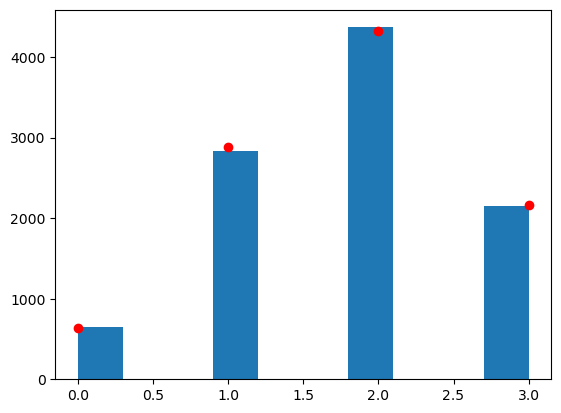

In [309]:
import matplotlib.pyplot as plt

plt.hist(x)
successes = [0, 1, 2, 3]
counts = [expected0, expected1,expected2,expected3]
plt.scatter(successes, counts, c="red")
# The graph matched with the expectation pretty well, we can see the red points on around top of each bar. 

In [310]:
#q2
mu = 0
sigma = 1
np.random.lognormal(mu, sigma, size=5)

array([0.21107997, 4.86616735, 3.6965388 , 2.52435835, 0.99757397])

In [311]:
#q2.1
S = 10000

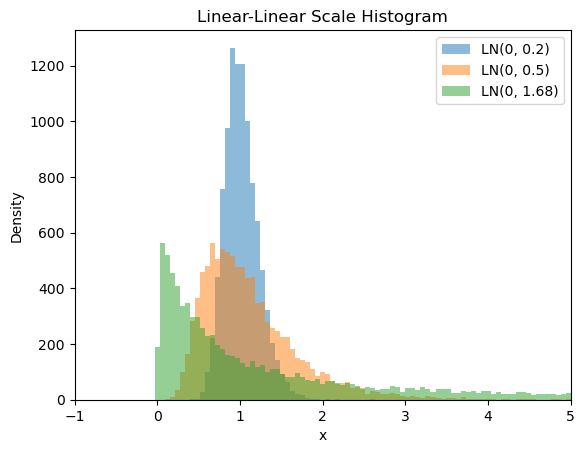

In [312]:
#q2.2
x2 = np.random.lognormal(0, 0.2, size=S)
x5 = np.random.lognormal(0, 0.5, size=S)
x68 = np.random.lognormal(0, 1.68, size=S)

bins = np.linspace(-1, 5, 100)

plt.hist(x2, bins, alpha=0.5, label='LN(0, 0.2)')
plt.hist(x5, bins, alpha=0.5, label='LN(0, 0.5)')
plt.hist(x68, bins, alpha=0.5, label='LN(0, 1.68)')
plt.ylabel("Density")
plt.xlabel("x")
plt.title("Linear-Linear Scale Histogram")
plt.xlim(-1,5)
plt.legend()
plt.show()
# The green one, with sigma = 1.68, is skewed to the right, while the 0.5 and 0.2 one look more normal.

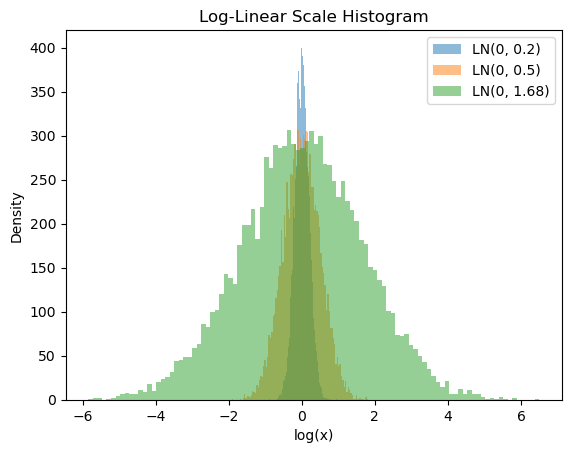

In [313]:
plt.hist(np.log(x2), bins=100, alpha=0.5, label='LN(0, 0.2)')
plt.hist(np.log(x5), bins=100, alpha=0.5, label='LN(0, 0.5)')
plt.hist(np.log(x68), bins=100, alpha=0.5, label='LN(0, 1.68)')
plt.ylabel("Density")
plt.xlabel("log(x)")
plt.title("Log-Linear Scale Histogram")
plt.legend()
plt.show()
# All of them looks pretty normal after getting the log of x.

#q2.3
Based on the linear-linear graph, the one with sigma = 0.2 looks more normal and equal than others. It is more concentrated with no skews. Based on the linear-log graph, sigma = 0.2 still appears the same and is least unequal. The one with sigma = 1.68 has a harger spread and looks more equal.

In [314]:
#q2.4
print("computed mean:", np.mean(x2), np.mean(x5), np.mean(x68))
print("computed var:", np.var(x2), np.var(x5), np.var(x68))
print("my computing:", 1.02, 1.13, 4.1, 0.04, 0.37, 266.6)
# Most of them looks similar, especially the one that is more equality.
# It is also obvious that the variance in inequal distribution are differnt between theoretical and sample values


computed mean: 1.0203810207338169 1.1251873726811867 3.9608109904401916
computed var: 0.04228001414493357 0.35713818717073087 188.19832700280602
my computing: 1.02 1.13 4.1 0.04 0.37 266.6


In [315]:
#2.5
x2pr = x2[x2 > np.percentile(x2, 54)].sum() / x2.sum() # top 46% = left 54%
x5pr = x5[x5 > np.percentile(x5, 60)].sum() / x5.sum() # top 40% = left 60%
x68pr = x68[x68 > np.percentile(x68, 80)].sum() / x68.sum() # top 20 = left 20%
# Clearly the first one is equality and the last one is most inequality.
# This calculation is correspounding to what we found in the histogram
print(x2pr, x5pr, x68pr)

0.5391030433141893 0.5977593590325951 0.7908038007085004


In [316]:
#3.1
# these two datasets look pretty well and make sense to me
import pandas as pd

citation = pd.read_csv('/Users/yanjiarui/desktop/info370/mag-30k-citations.csv.bz2', sep='\t')
treatment = pd.read_csv('/Users/yanjiarui/desktop/info370/treatment.csv.bz2', sep='\t')
citation.head()

,id,citations,year
0,1926704088,10,2004
1,1590836146,0,1971
2,2035484488,3,2007
3,1965723909,0,2009
4,2021155615,42,1998


In [317]:
treatment.head()

,treat,age,educ,ethn,married,re74,re75,re78,u74,u75
0,True,37,11,black,True,0.0,0.0,9930.05,True,True
1,True,30,12,black,False,0.0,0.0,24909.50,True,True
2,True,27,11,black,False,0.0,0.0,7506.15,True,True
3,True,33,8,black,False,0.0,0.0,289.79,True,True
4,True,22,9,black,False,0.0,0.0,4056.49,True,True


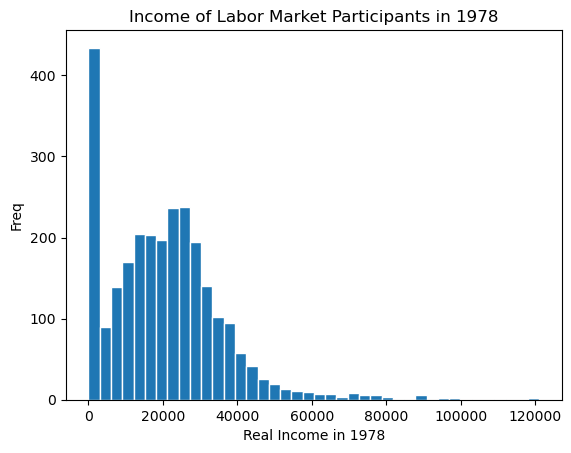

In [318]:
#3.2
plt.hist(treatment['re78'], bins=40, edgecolor='w')
plt.xlabel('Real Income in 1978')
plt.ylabel('Freq')
plt.title('Income of Labor Market Participants in 1978')
plt.show()

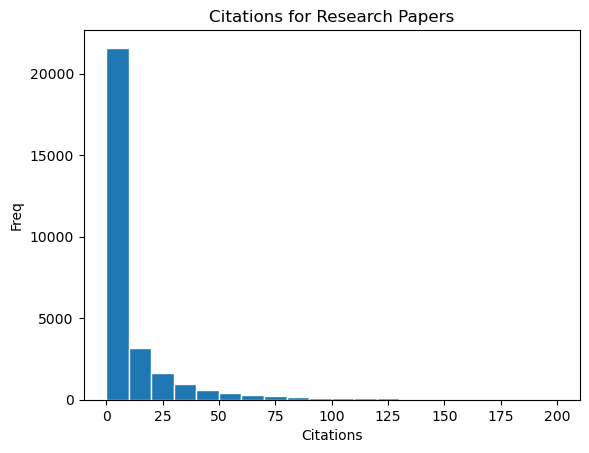

In [319]:
plt.hist(citation['citations'], bins=20, range=[0, 200], edgecolor='w')
plt.ylabel('Freq')
plt.xlabel('Citations')
plt.title('Citations for Research Papers')
plt.show()


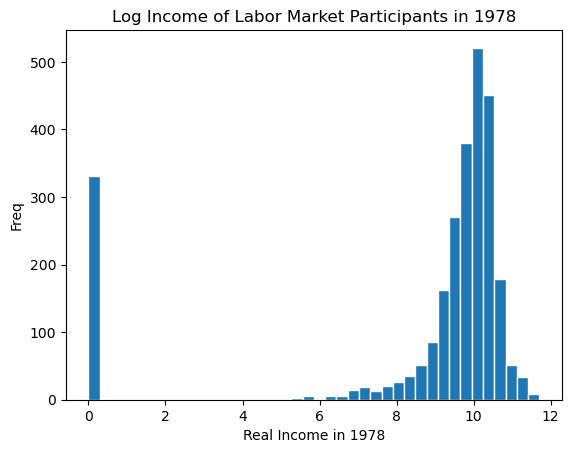

In [320]:
plt.hist(np.log(treatment['re78']+1), bins=40, edgecolor='w')
plt.xlabel('Real Income in 1978')
plt.ylabel('Freq')
plt.title('Log Income of Labor Market Participants in 1978')
plt.show()

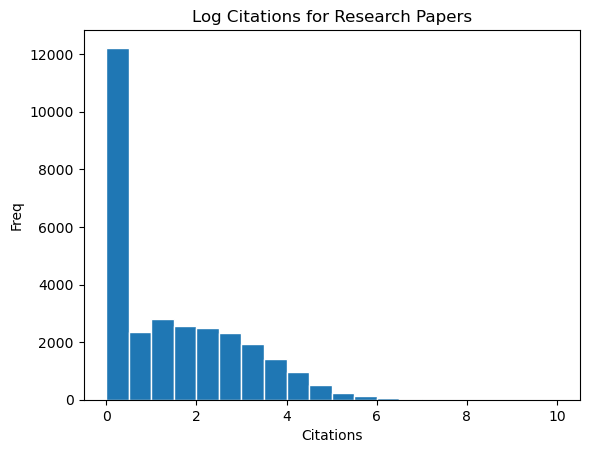

In [321]:
plt.hist(np.log(citation['citations']+1), bins=20, range=[0, 10], edgecolor='w')
plt.ylabel('Freq')
plt.xlabel('Citations')
plt.title('Log Citations for Research Papers')
plt.show()

In [322]:
in_mean = treatment['re78'].mean()
in_std = treatment['re78'].std()
in_diff = in_mean - in_std
print(in_mean, in_std, in_diff)

20502.37607865417 15632.519774212507 4869.856304441664


In [323]:
ci_mean = citation['citations'].mean()
ci_std = citation['citations'].std()
ci_diff = ci_mean - ci_std
print(ci_mean, ci_std, ci_diff)

15.605633333333333 79.17810312200979 -63.57246978867646


In [324]:
#3.4
in_pr = treatment[treatment.re78 > np.percentile(treatment.re78, 63)].re78.sum() / treatment.re78.sum()
ci_pr = citation[citation.citations > np.percentile(citation.citations, 82.5)].citations.sum() / citation.citations.sum()
print(in_pr, ci_pr)

0.6474562618876845 0.8221411498839094


In [325]:
#4.1
R = 10000
sample = np.random.binomial(3, 0.6, size=R)

In [326]:
#4.2
real = []
for i in range(R):
    x = np.random.binomial(3, 0.6)
    real.append(x)

In [327]:
#4.3
np.var(real)

0.72323984

In [328]:
#4.4
paired_real = []
for i in range(R):
    x = np.random.binomial(3, 0.6, size=2)
    paired_real.append(np.mean(x))

In [329]:
#4.5
np.var(paired_real)

0.36983624

In [330]:
#4.6
ten_real = []
for i in range(R):
    x = np.random.binomial(3, 0.6, size=10)
    ten_real.append(np.mean(x))
hundred_real = []
for i in range(R):
    x = np.random.binomial(3, 0.6, size=100)
    hundred_real.append(np.mean(x))
print(np.var(ten_real), np.var(hundred_real))

0.0712784384 0.007124547975


In [331]:
#4.7
# According to the text book, the distribution will lokks more normal when we increase the number of S or RV-s
# Since the sample size is increased largely in this case, the distribution will tend to be more cluster.
# The mean will closer to the true mean, and the variance will decrease.